# Búsqueda de características de las reseñas que dan puntajes positivos

Para este análisis se tomará el archivo ya procesado del analisis de sentimientos para la búsqueda de cararísticas clave del éxito de un negocio

In [56]:
# Se importan librerias
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [57]:
# Carga de dataframe
df_review = pd.read_parquet('review_final_final.parquet')
df_review

,text,gmap_id,fecha,sentiment
0,make korean traditional food properly,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2016-01-30 19:38:55,positive
1,great food price portion large,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2016-07-15 13:11:12,positive
2,chicken sandwich delicious definitely twist fl...,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,2013-12-21 05:26:13,positive
3,love place fry garlic chicken crispy savory al...,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,2022-09-20 07:51:08,positive
4,delicious variety food good place go either qu...,0x80c2d765f8c90a3d:0x16afb75943e7ad50,2013-06-06 18:41:37,positive
...,...,...,...,...
169904,maybe order delivery noodle hard eat soup room...,0x808fe955b0beae57:0xb3159fe6572670c3,2014-09-04 00:38:44,positive
169905,great food staff kind gentleman help tonight g...,0x808fe955b0beae57:0xb3159fe6572670c3,2018-06-05 03:31:51,positive
169906,place take osaka raman try black garlic raman ...,0x808fe955b0beae57:0xb3159fe6572670c3,2017-07-02 19:41:03,negative
169907,delicious raman clean din room good service,0x808fe955b0beae57:0xb3159fe6572670c3,2020-11-05 01:30:44,positive


Filtro las reseñas positivas 

In [58]:
# Seleccionar en df_positive solo reseñas positivas
df_positive = df_review[df_review['sentiment'] == 'positive']


In [59]:
# Unir todos los textos en una sola cadena
all_words = ' '.join(df_positive['text']).split()
# Contar la frecuencia de cada palabra
word_freq = Counter(all_words)

In [61]:
# Mostrar las 50 palabras más comunes
most_common_words = word_freq.most_common(50)
most_common_words

[('good', 68633),
 ('food', 68330),
 ('great', 50455),
 ('service', 34495),
 ('place', 33425),
 ('love', 16593),
 ('delicious', 15400),
 ('always', 15399),
 ('go', 15166),
 ('friendly', 15039),
 ('nice', 13675),
 ('get', 13489),
 ('staff', 13195),
 ('price', 13039),
 ('time', 11713),
 ('well', 11666),
 ('really', 10845),
 ('restaurant', 9882),
 ('like', 9632),
 ('come', 9448),
 ('order', 9375),
 ('eat', 8811),
 ('fresh', 8789),
 ('excellent', 8674),
 ('amazing', 8593),
 ('make', 8148),
 ('pizza', 7977),
 ('recommend', 7902),
 ('try', 7809),
 ('one', 7762),
 ('back', 7618),
 ('fast', 7497),
 ('burger', 7075),
 ('chicken', 7029),
 ('clean', 6563),
 ('awesome', 6169),
 ('definitely', 5747),
 ('taste', 5734),
 ('customer', 5548),
 ('little', 5542),
 ('menu', 5514),
 ('taco', 5489),
 ('fry', 5384),
 ('also', 5377),
 ('wait', 5222),
 ('tasty', 5151),
 ('spot', 4951),
 ('take', 4873),
 ('atmosphere', 4868),
 ('favorite', 4863)]

>Se observa muchas palabras que no dan clave de éxito y en este contexto son stop word, por lo que se eliminaran.

In [62]:
# Lista de palabras a eliminar ya que no dan pauta de caracteristicas de exito
stop_words = [
    'good', 'great', 'place', 'love', 'always', 'go', 'nice', 'get',
    'one', 'back', 'definitely', 'little', 'also', 'wait', 'eat','like'
    'take', 'would', 'people', 'super', 'pretty', 'lot', 'everything',
    'worth', 'area', 'food', 'restaurant', 'pizza', 'burger', 'chicken',
    'taco', 'fry', 'lunch', 'sandwich', 'drink', 'meal', 'salad',
    'breakfast', 'favorite', 'family', 'try', 'recommend', 'enjoy','delicious',
    'excellent','amazing','awesome','well','like', 'really','come','take','make'
]


In [63]:
# Filtrar most_common_words para eliminar las stop_words
filtered_words = [word for word in most_common_words if word[0] not in stop_words]
filtered_words


[('service', 34495),
 ('friendly', 15039),
 ('staff', 13195),
 ('price', 13039),
 ('time', 11713),
 ('order', 9375),
 ('fresh', 8789),
 ('fast', 7497),
 ('clean', 6563),
 ('taste', 5734),
 ('customer', 5548),
 ('menu', 5514),
 ('tasty', 5151),
 ('spot', 4951),
 ('atmosphere', 4868)]

>Esta tupla de palabras si me da caracteristicas que puedo analizar

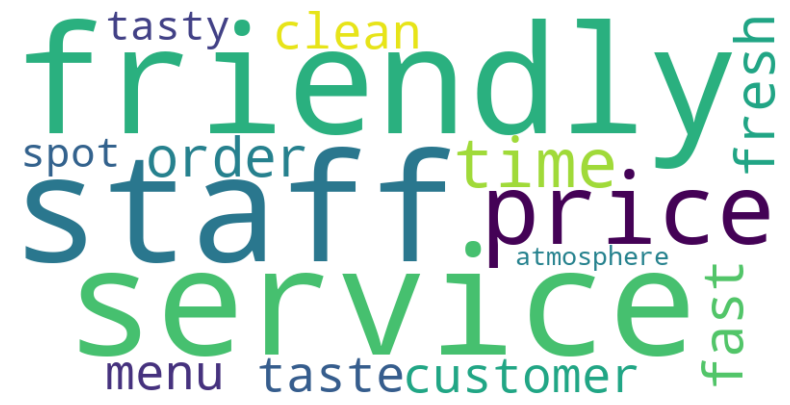

In [64]:
# Convertir la lista de tuplas en un diccionario
word_freq_dict = dict(filtered_words)

# Grafico de nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_freq_dict))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusiones

**Enfoque en el servicio y la atención al cliente:**

La palabra "service" aparece como la más frecuente, lo que indica que un buen servicio es un factor crucial para la satisfacción de los clientes.
"Friendly" y "staff" también tienen una alta frecuencia, lo que sugiere que la amabilidad y la actitud del personal son altamente valoradas por los usuarios.


**Importancia de la relación calidad-precio:**

La frecuencia de la palabra "price" muestra que los clientes prestan atención a los precios.

**Rapidez y eficiencia:**

Términos como "time", "fast", y "order" indican que la rapidez en el servicio es un aspecto importante. 

**Calidad de los productos:**

Palabras como "fresh", "taste", y "tasty" sugieren que la frescura y el sabor de la comida son determinantes para la satisfacción de los clientes. 

**Higiene y ambiente:**

La aparición de "clean" y "atmosphere" sugiere que los clientes valoran un ambiente limpio y agradable.

**Variedad en el menú:**

La mención de "menu" y "spot" indica que la diversidad de opciones y la selección de platos disponibles son factores que los clientes aprecian, lo que podría influir en su decisión de volver a un establecimiento.